In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#from animate import *
import sys
sys.path.append('../src/')
from helper_functions import *
plt.style.use('dynamics_site')

## Define Integration Loop

In [6]:
def integrate_PC_ABM33(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    
    #we compute the first steps with forward euler
    new_vvec = vvec + dt*get_acclerations(Rs[0],mvec)
    new_rvec = rvec + dt*Vs[0]
    Rs.append(new_rvec)
    Vs.append(new_vvec)
    new_vvec = vvec + dt*get_acclerations(Rs[1],mvec)
    new_rvec = rvec + dt*Vs[1]
    Rs.append(new_rvec)
    Vs.append(new_vvec)

    for i in range(steps-1):
        #do prediction with AB
        new_vvec_prime = vvec + (dt/12)*(23*get_acclerations(Rs[-1],mvec) - 16*get_acclerations(Rs[-2],mvec) + 5*get_acclerations(Rs[-3],mvec))
        new_rvec_prime = rvec + (dt/12)*(23*Vs[-1] - 16*Vs[-2] + 5*Vs[-3])
        #now do correction with AM
        new_vvec = vvec + (dt/12)*(5*get_acclerations(new_rvec_prime,mvec) + 8*get_acclerations(Rs[-1],mvec) - 1*get_acclerations(Rs[-2],mvec) )
        new_rvec = rvec + (dt/12)*(5*new_vvec_prime + 8*Vs[-1] - 1*Vs[-2])

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

## Preform Integration

In [7]:
dt = 0.001
steps = 20000
Rs,Vs,Es = integrate_PC_ABM33('../src/Earth-Sun.npy',dt,steps)
xs,ys = Rs[:,:2,0].T
xp,yp = Rs[:,:2,1].T
times = np.linspace(0,steps*dt,steps)

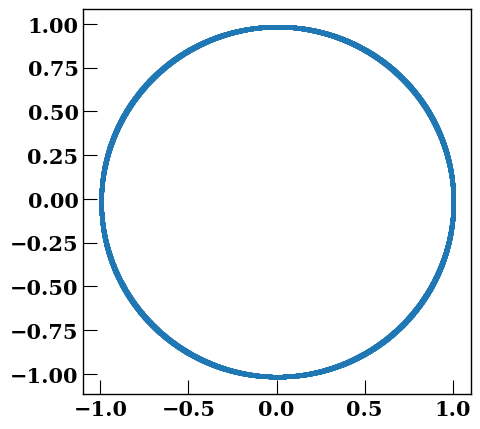

In [8]:
plt.scatter(xp,yp)

## Generate Output 

In [4]:
def makeplot(i):
    xs,ys = Rs[:i,:2,0].T
    xp,yp = Rs[:i,:2,1].T
    relative_error = Es[:i]
    times = np.linspace(0,steps*dt,steps)


    fig,ax = plt.subplots(ncols=2,figsize=(20,10))
    ax[0].scatter(xs[-1],ys[-1],c='k',marker='*',s=100)
    ax[0].plot(xp,yp,c='k',alpha=0.3)
    ax[0].scatter(xp[-1],yp[-1],c='k',s=100)
    ax[0].set_xlabel("X [AU]")
    ax[0].set_ylabel("Y [AU]")
    ax[0].set_xlim(-1.25*np.max(Rs),1.25*np.max(Rs))
    ax[0].set_ylim(-1.25*np.max(Rs),1.25*np.max(Rs))

    ax[1].plot(times[:i],relative_error,c='k')
    ax[1].set_ylabel("Energy(t)")
    ax[1].set_xlabel("Time [yrs]")
    ax[1].set_xlim(0,np.max(times))
    ax[1].set_ylim(np.min(Es),np.max(Es))
    plt.suptitle(r"$\Delta t = 0.001 [yrs]$")
    return fig

In [5]:
parameter_grid = list(range(1,len(Rs),50)) #plot every 5th timestep
savefigures(makeplot,parameter_grid,outdir='./AB2/')
render('./AB2/','AB2','gif',runtime=20)

saving figures


100%|█████████████████████████████████████████| 400/400 [06:16<00:00,  1.06it/s]


Framerate is 20 fps
Total Runtime is 20 s


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,20 CPUs 12th Gen Intel(R) Core(TM) i7-12700H (906A3),ASM,AES-NI)

Scanning the drive:
400 files, 105203889 bytes (101 MiB)

Creating archive: ../AB2.7z

Items to compress: 400


Files read from disk: 400
Archive size: 42166383 bytes (41 MiB)
Everything is Ok
no cleanup type specified
